In [1]:
import pandas as p
import numpy
import matplotlib.pyplot as plt

In [161]:
#load the two datasets
world_data_2023_df = p.read_csv("world-data-2023.csv")
emigration_immigration_rates_df = p.read_excel("emigration-immigration-rates.xlsx")

#save copies of the datasets
justImportedWorldData = world_data_2023_df.copy(deep=True)
justImportedEmigrationData = emigration_immigration_rates_df.copy(deep=True)

In [162]:
print(world_data_2023_df.keys())
print(emigration_immigration_rates_df.keys())

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')
Index(['country', 'isoo', 'year', 'region10_ori', 'iso3', 'Emigrants_males_HS',
       'Emigrants_males_LS', 'Emigrants_males', 'Emigrants_014_male',
       'Emigrants_females_H

In [164]:
#using the information from https://www.iban.com/country-codes, we create a mapping from the two letter codes to three letter codes
twoToThreeLetterCountryCodeMapping = {
    "AF": "AFG", "AL": "ALB", "DZ": "DZA", "AS": "ASM", "AD": "AND", "AO": "AGO", "AI": "AIA",
    "AQ": "ATA", "AG": "ATG", "AR": "ARG", "AM": "ARM", "AW": "ABW", "AU": "AUS", "AT": "AUT",
    "AZ": "AZE", "BS": "BHS", "BH": "BHR", "BD": "BGD", "BB": "BRB", "BY": "BLR", "BE": "BEL",
    "BZ": "BLZ", "BJ": "BEN", "BM": "BMU", "BT": "BTN", "BO": "BOL", "BQ": "BES", "BA": "BIH",
    "BW": "BWA", "BV": "BVT", "BR": "BRA", "IO": "IOT", "BN": "BRN", "BG": "BGR", "BF": "BFA",
    "BI": "BDI", "CV": "CPV", "KH": "KHM", "CM": "CMR", "CA": "CAN", "KY": "CYM", "CF": "CAF",
    "TD": "TCD", "CL": "CHL", "CN": "CHN", "CX": "CXR", "CC": "CCK", "CO": "COL", "KM": "COM",
    "CD": "COD", "CG": "COG", "CK": "COK", "CR": "CRI", "HR": "HRV", "CU": "CUB", "CW": "CUW",
    "CY": "CYP", "CZ": "CZE", "CI": "CIV", "DK": "DNK", "DJ": "DJI", "DM": "DMA", "DO": "DOM",
    "EC": "ECU", "EG": "EGY", "SV": "SLV", "GQ": "GNQ", "ER": "ERI", "EE": "EST", "SZ": "SWZ",
    "ET": "ETH", "FK": "FLK", "FO": "FRO", "FJ": "FJI", "FI": "FIN", "FR": "FRA", "GF": "GUF",
    "PF": "PYF", "TF": "ATF", "GA": "GAB", "GM": "GMB", "GE": "GEO", "DE": "DEU", "GH": "GHA",
    "GI": "GIB", "GR": "GRC", "GL": "GRL", "GD": "GRD", "GP": "GLP", "GU": "GUM", "GT": "GTM",
    "GG": "GGY", "GN": "GIN", "GW": "GNB", "GY": "GUY", "HT": "HTI", "HM": "HMD", "VA": "VAT",
    "HN": "HND", "HK": "HKG", "HU": "HUN", "IS": "ISL", "IN": "IND", "ID": "IDN", "IR": "IRN",
    "IQ": "IRQ", "IE": "IRL", "IM": "IMN", "IL": "ISR", "IT": "ITA", "JM": "JAM", "JP": "JPN",
    "JE": "JEY", "JO": "JOR", "KZ": "KAZ", "KE": "KEN", "KI": "KIR", "KP": "PRK", "KR": "KOR",
    "KW": "KWT", "KG": "KGZ", "LA": "LAO", "LV": "LVA", "LB": "LBN", "LS": "LSO", "LR": "LBR",
    "LY": "LBY", "LI": "LIE", "LT": "LTU", "LU": "LUX", "MO": "MAC", "MG": "MDG", "MW": "MWI",
    "MY": "MYS", "MV": "MDV", "ML": "MLI", "MT": "MLT", "MH": "MHL", "MQ": "MTQ", "MR": "MRT",
    "MU": "MUS", "YT": "MYT", "MX": "MEX", "FM": "FSM", "MD": "MDA", "MC": "MCO", "MN": "MNG",
    "ME": "MNE", "MS": "MSR", "MA": "MAR", "MZ": "MOZ", "MM": "MMR", "NA": "NAM", "NR": "NRU",
    "NP": "NPL", "NL": "NLD", "NC": "NCL", "NZ": "NZL", "NI": "NIC", "NE": "NER", "NG": "NGA",
    "NU": "NIU", "NF": "NFK", "MP": "MNP", "NO": "NOR", "OM": "OMN", "PK": "PAK", "PW": "PLW",
    "PS": "PSE", "PA": "PAN", "PG": "PNG", "PY": "PRY", "PE": "PER", "PH": "PHL", "PN": "PCN",
    "PL": "POL", "PT": "PRT", "PR": "PRI", "QA": "QAT", "MK": "MKD", "RO": "ROU", "RU": "RUS",
    "RW": "RWA", "RE": "REU", "BL": "BLM", "SH": "SHN", "KN": "KNA", "LC": "LCA", "MF": "MAF",
    "PM": "SPM", "VC": "VCT", "WS": "WSM", "SM": "SMR", "ST": "STP", "SA": "SAU", "SN": "SEN",
    "RS": "SRB", "SC": "SYC", "SL": "SLE", "SG": "SGP", "SX": "SXM", "SK": "SVK", "SI": "SVN",
    "SB": "SLB", "SO": "SOM", "ZA": "ZAF", "GS": "SGS", "SS": "SSD", "ES": "ESP", "LK": "LKA",
    "SD": "SDN", "SR": "SUR", "SJ": "SJM", "SE": "SWE", "CH": "CHE", "SY": "SYR", "TW": "TWN",
    "TJ": "TJK", "TZ": "TZA", "TH": "THA", "TL": "TLS", "TG": "TGO", "TK": "TKL", "TO": "TON",
    "TT": "TTO", "TN": "TUN", "TR": "TUR", "TM": "TKM", "TC": "TCA", "TV": "TUV", "UG": "UGA",
    "UA": "UKR", "AE": "ARE", "GB": "GBR", "UM": "UMI", "US": "USA", "UY": "URY", "UZ": "UZB",
    "VU": "VUT", "VE": "VEN", "VN": "VNM", "VG": "VGB", "VI": "VIR", "WF": "WLF", "EH": "ESH",
    "YE": "YEM", "ZM": "ZMB", "ZW": "ZWE", "AX": "ALA"}

#create a new column using the corresponding 3 letter abbreviations from the two letter abbreviations provided
world_data_2023_df["iso3"] = world_data_2023_df["Abbreviation"].map(twoToThreeLetterCountryCodeMapping)

world_data_2023_df["GDP"] = world_data_2023_df["GDP"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Minimum wage"] = world_data_2023_df["Minimum wage"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Unemployment rate"] = world_data_2023_df["Unemployment rate"].str.replace("%","").astype(float)
world_data_2023_df["OOP health expenditure"] = world_data_2023_df["Out of pocket health expenditure"].str.replace("%","").astype(float)
world_data_2023_df["Primary education enrollment"] = world_data_2023_df["Gross primary education enrollment (%)"].str.replace("%","").astype(float)
world_data_2023_df["Tertiary education enrollment"] = world_data_2023_df["Gross tertiary education enrollment (%)"].str.replace("%","").astype(float)

In [167]:
emigrants_immagrants_totals_2020_df = emigration_immigration_rates_df[emigration_immigration_rates_df["year"] == 2020][["iso3","Emigrants_total","Immigrants_total","emig_rate","immig_rate"]]
emigrants_immagrants_totals_2020_df["iso3"] = emigrants_immagrants_totals_2020_df["iso3"].replace("ZAR","COD")

In [169]:
#Birth rate
#Infant mortality rate
#Number of physicians available
#Life expectancy
#Out of pocket healthcare costs
#GDP
#unemployment rate
#Minimum Wage
#Primary school enrollment
#Tertiary education enrollment
#Emigrant and immigrant total numbers

columnsFromWorldData = world_data_2023_df[["iso3",
                                           "Birth Rate",
                                           "Infant mortality",
                                           "Physicians per thousand",
                                           "Life expectancy",
                                           "OOP health expenditure",
                                           "GDP",
                                           "Unemployment rate",
                                           "Minimum wage",
                                           "Primary education enrollment",
                                           "Tertiary education enrollment"]]

columnsFromEmigrationImmigrationData = emigrants_immagrants_totals_2020_df

In [171]:
combinedColumns = p.merge(columnsFromWorldData,columnsFromEmigrationImmigrationData, on="iso3")
columnTitles = ["Birth Rate",
                "Infant mortality",
                "Physicians per thousand",
                "Life expectancy",
                "OOP health expenditure",
                "GDP",
                "Unemployment rate",
                "Minimum wage",
                "Primary education enrollment",
                "Tertiary education enrollment",
                "Emigrants_total",
                "Immigrants_total",
                "emig_rate",
                "immig_rate"]
 
variablesOfInterest = combinedColumns[columnTitles]

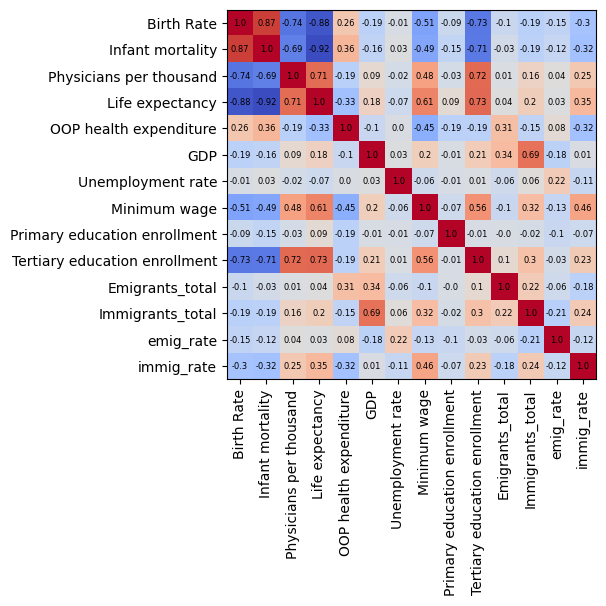

In [173]:
correlations = variablesOfInterest.corr()

plt.imshow(correlations,cmap="coolwarm")

plt.yticks(numpy.arange(len(columnTitles)),labels=columnTitles)
plt.xticks(numpy.arange(len(columnTitles)),labels=columnTitles,rotation=90)

y = 0
for i,row in correlations.iterrows():
    x = 0
    for column in row.keys():
        #align the text to the center and round the value to 2 decimal places
        plt.text(x, y, round(row[column],2), ha="center", va="center", color="black", fontsize="6")
        x += 1
    y += 1